<a href="https://colab.research.google.com/github/kartoone/nn3/blob/main/colab/theano2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
#!cat ~/.keras/keras.json
!git clone "https://github.com/kartoone/nn3"
!cat nn3/keras.json > ~/.keras/keras.json
!pip uninstall -y keras
!pip uninstall -y tensorflow
!pip install tensorflow==2.2
!pip install keras==2.2.4
!pip install pydot-ng
!pip install theano==0.8
%cd nn3/src


Cloning into 'nn3'...
remote: Enumerating objects: 170, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 170 (delta 32), reused 26 (delta 11), pack-reused 109
Receiving objects: 100% (170/170), 94.36 MiB | 20.03 MiB/s, done.
Resolving deltas: 100% (41/41), done.
Updating files: 100% (107/107), done.
Found existing installation: Keras 2.2.4
Uninstalling Keras-2.2.4:
  Successfully uninstalled Keras-2.2.4
Found existing installation: tensorflow 2.2.0
Uninstalling tensorflow-2.2.0:
  Successfully uninstalled tensorflow-2.2.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached tensorflow-2.2.0-cp38-cp38-manylinux2010_x86_64.whl (516.3 MB)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached Keras-2.2.4-py2.py3-none-any.whl (312 kB)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/co

In [10]:
!cat ~/.keras/keras.json


{
    "floatx": "float32",
    "epsilon": 1e-07,
    "backend": "theano",
    "image_dim_ordering": "th",
    "image_data_format": "channels_first"
}


In [ ]:
%cd nn3/src

import network3
from network3 import Network
from network3 import ConvPoolLayer, FullyConnectedLayer, SoftmaxLayer
training_data, validation_data, test_data = network3.load_data_shared()
mini_batch_size = 10
net = Network([
        FullyConnectedLayer(n_in=784, n_out=100),
        SoftmaxLayer(n_in=100, n_out=10)], mini_batch_size)
net.SGD(training_data, 60, mini_batch_size, 0.1, 
            validation_data, test_data)


In [56]:
import numpy as np

# assumes batch size of 10
def findTroublesomeImage(net, test_data, batchsize=10):
  batches = int(len(test_data[1].eval())/batchsize)
  print(batches)
  worsta = 1.0
  worsti = 0
  for i in range(batches):
    outputs = net.test_mb_outputs(i)
    for a in outputs:
      if np.max(a)<worsta:
        worsta = np.max(a)
        worsti = i
  return (worsti, worsta)

1000
417
0.34038273
2
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 19, 39, 28, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 190, 207, 146, 97, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 198, 252, 161, 247, 117, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 102, 253, 253, 253, 244, 193, 35, 5, 39, 28, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 46, 224, 253, 253, 253, 253, 215, 152, 253, 218, 138, 72, 0, 0, 0, 0,

array([[1.09821917e-12, 9.99141574e-01, 4.01798934e-06, 6.46691706e-06,
        9.27450614e-08, 4.03546983e-06, 1.59013780e-06, 3.00929166e-08,
        8.42196343e-04, 2.56898574e-08],
       [1.14846609e-12, 9.99946535e-01, 1.61943194e-06, 1.56236854e-06,
        1.33953290e-06, 8.99265218e-10, 3.04582295e-06, 7.11091252e-06,
        3.80444981e-05, 7.64457184e-07],
       [6.04362201e-15, 5.66664195e-14, 2.46377408e-13, 1.53607994e-11,
        9.99999940e-01, 3.14958372e-11, 2.06374055e-14, 1.71603642e-09,
        1.11706810e-09, 4.41879138e-08],
       [3.07704823e-07, 1.72420638e-04, 9.93036389e-01, 2.72560446e-03,
        3.57864005e-03, 1.04518767e-06, 3.71549453e-04, 8.08528444e-09,
        1.11789530e-04, 2.27143983e-06],
       [2.26471411e-11, 2.16282281e-08, 3.65430845e-11, 1.83408531e-06,
        1.60369324e-03, 9.99888385e-08, 6.09211412e-13, 8.74548505e-08,
        1.94192197e-07, 9.98394072e-01],
       [1.19355373e-10, 3.55700180e-08, 1.37224383e-08, 5.87725651e-07,
   

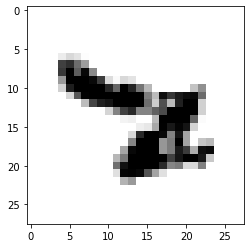

In [61]:
import matplotlib.pyplot as plt

(worsti, worsta) = findTroublesomeImage(net, test_data)
print(worsti)
print(worsta)

print(test_data[1][4176].eval())
pixeldata = test_data[0][4176].reshape((28,28)).eval()
pixeldata = [[round(p*255) for p in pix] for pix in pixeldata]
print(pixeldata)
plt.figure()
plt.imshow(pixeldata, cmap="gray_r")
net.test_mb_outputs(417)


In [ ]:
!pip show theano

Name: Theano
Version: 0.8.0
Summary: Optimizing compiler for evaluating mathematical expressions on CPUs and GPUs.
Home-page: http://deeplearning.net/software/theano/
Author: LISA laboratory, University of Montreal
Author-email: theano-dev@googlegroups.com
License: BSD
Location: /usr/local/lib/python3.8/dist-packages
Requires: numpy, scipy, six
Required-by: 
